# Ray Tracing in One Weekend

[Ray Tracing in One Weekend](https://raytracing.github.io/books/RayTracingInOneWeekend.html) in a Julia Notebook.

## Vec3

In [1]:
struct Vec3
    x::Float64
    y::Float64
    z::Float64
end

In [2]:
Base.:+(u::Vec3, v::Vec3) = Vec3(u.x + v.x, u.y + v.y, u.z + v.z)

In [3]:
Base.:-(v::Vec3) = Vec3(-v.x, -v.y, -v.z)
Base.:-(u::Vec3, v::Vec3) = Vec3(u.x - v.x, u.y - v.y, u.z - v.z)

In [4]:
Base.:*(u::Vec3, v::Vec3) = Vec3(u.x * v.x, u.y * v.y, u.z * v.z)
Base.:*(v::Vec3, t::Number) = Vec3(v.x * t, v.y * t, v.z * t)
Base.:*(t::Number, v::Vec3) = v * t

In [5]:
Base.:/(v::Vec3, t::Number) = Vec3(v.x / t, v.y / t, v.z / t)

In [6]:
length_squared(v::Vec3) = v.x * v.x + v.y * v.y + v.z * v.z

length_squared (generic function with 1 method)

In [7]:
# length(collection) is for number of elements
length_vector(v::Vec3) = sqrt(length_squared(v))

length_vector (generic function with 1 method)

In [8]:
dot(u::Vec3, v::Vec3) = u.x * v.x + u.y * v.y + u.z * v.z

dot (generic function with 1 method)

In [9]:
cross(u::Vec3, v::Vec3) = Vec3(
    u.y * v.z - u.z * v.y,
    u.z * v.x - u.x * v.z,
    u.x * v.y - u.y * v.x
)

cross (generic function with 1 method)

In [10]:
unit_vector(v::Vec3) = v / length_vector(v)

unit_vector (generic function with 1 method)

## Rays

In [11]:
struct Ray
    origin::Vec3
    direction::Vec3
end

In [12]:
at(ray::Ray, t::Number) = ray.origin + t * ray.direction

at (generic function with 1 method)

## Image

In [13]:
using Images

In [14]:
function hit_sphere(center::Vec3, radius::Float64, r::Ray)
    oc = r.origin - center
    a = dot(r.direction, r.direction)
    b = 2 * dot(oc, r.direction)
    c = dot(oc, oc) - radius * radius
    discriminant = b * b - 4 * a * c
    discriminant > 0
 end

hit_sphere (generic function with 1 method)

In [15]:
function ray_color(r::Ray)
    if hit_sphere(Vec3(0, 0, -1), 0.5, r)
        Vec3(1, 0, 0)
    else
        unit_direction = unit_vector(r.direction)
        t = 0.5 * (unit_direction.y + 1)
        (1 - t) * Vec3(1, 1, 1) + t * Vec3(0.5, 0.7, 1.0)
    end
end

ray_color (generic function with 1 method)

In [16]:
const aspect_ratio = 16 / 9
const image_width = 384
const image_height = Int(image_width ÷ aspect_ratio);

In [17]:
const origin = Vec3(0, 0, 0)
const horizontal = Vec3(4, 0, 0)
const vertical = Vec3(0, 2.25, 0)
const lower_left_corner = origin - horizontal / 2 - vertical / 2 - Vec3(0, 0, 1);

In [18]:
function color(i::Int, j::Int)
    u = i / image_width   
    v = j / image_height
    
    r = Ray(origin, lower_left_corner + u * horizontal + v * vertical)
    pixel_color = ray_color(r)
    RGB(pixel_color.x, pixel_color.y, pixel_color.z)
end

color (generic function with 1 method)

In [19]:
function render()
    [color(i, j) for j in image_height:-1:1, i in 1:image_width]
end

render (generic function with 1 method)

  0.001454 seconds (4 allocations: 1.899 MiB)


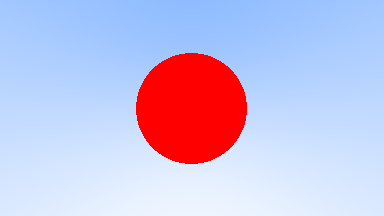

In [20]:
@time render()